# Imports

In [233]:
import json
import random
import networkx as nx
from matplotlib import pyplot as plt
from networkx.readwrite import json_graph

COLOR_BG = "#a8dadc"
COLOR_FG = "#457b9d"
SIZE_BG_NODES = 800
SIZE_FG_NODES = 2400
EDGE_BG_WEIGHT = 4
EDGE_FG_WEIGHT = 24
MATRIX_SIDE = 10
NO_FG_NODES = 20
FIG_SIZE = (12, 12)

# Activity 2

## 2.1 Sub-activity: Graph creation

### Task 1

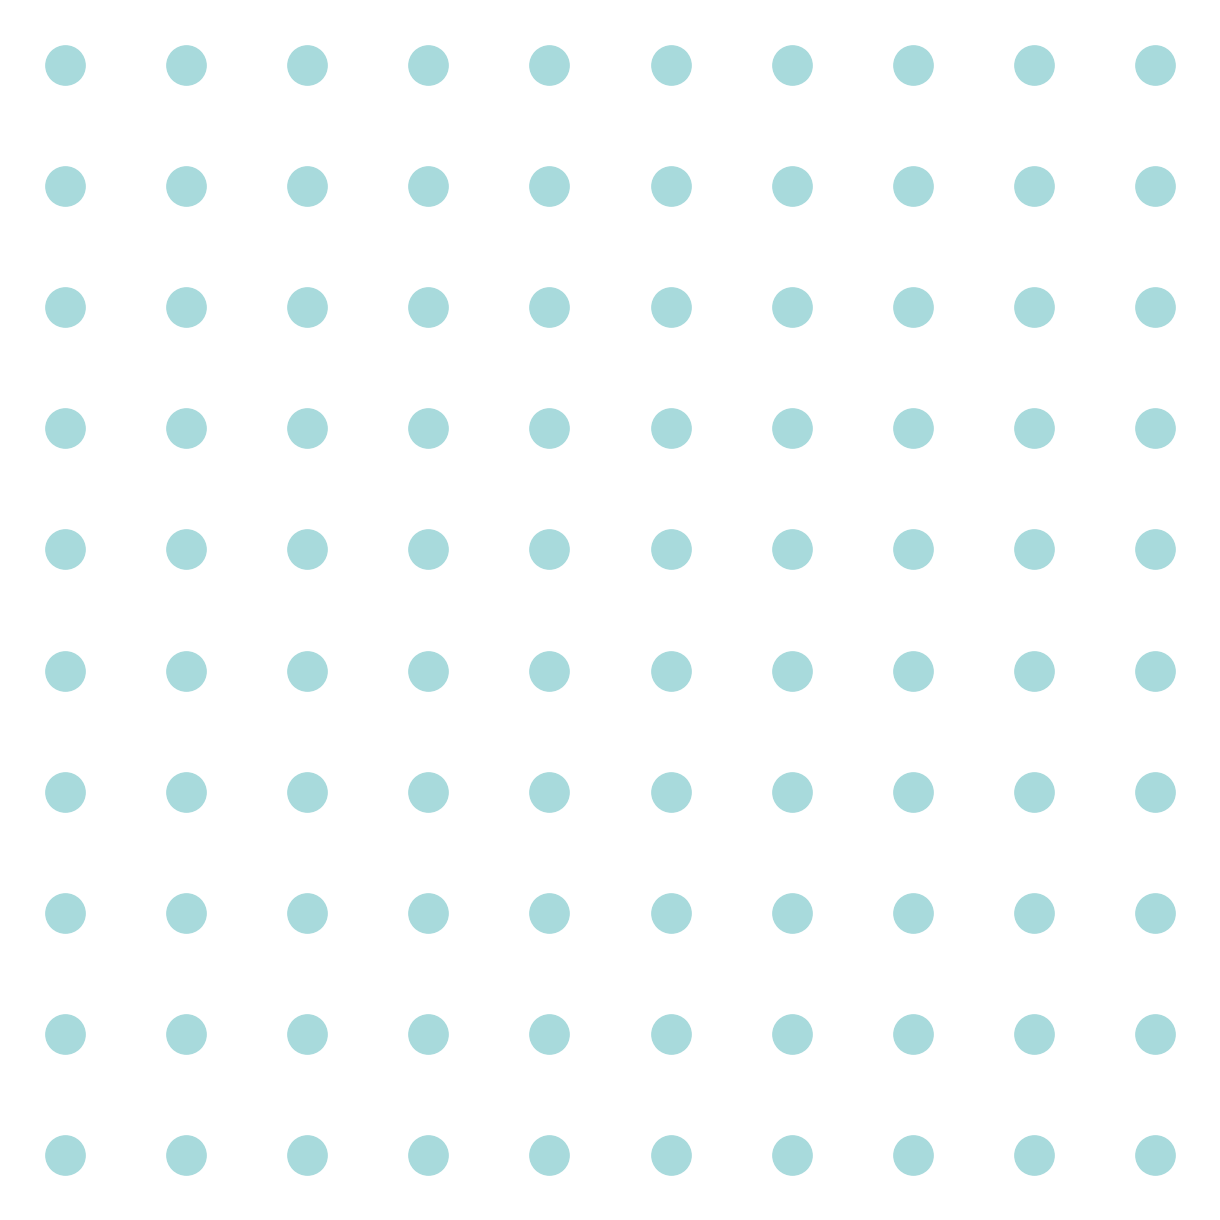

In [234]:
# Create a 2D grid graph
G = nx.grid_2d_graph(MATRIX_SIDE, MATRIX_SIDE)

# Get the positions of the nodes
pos = {(x,y):(y,-x) for x in range(MATRIX_SIDE) for y in range(MATRIX_SIDE)}

# Remove the edges between the nodes
G.remove_edges_from(G.edges())

# Set the figure size
plt.figure(figsize = FIG_SIZE)

# Draw the grid graph
nx.draw(G, pos=pos, node_color = COLOR_BG, node_size = SIZE_BG_NODES)

### Task 2

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (9, 0), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]


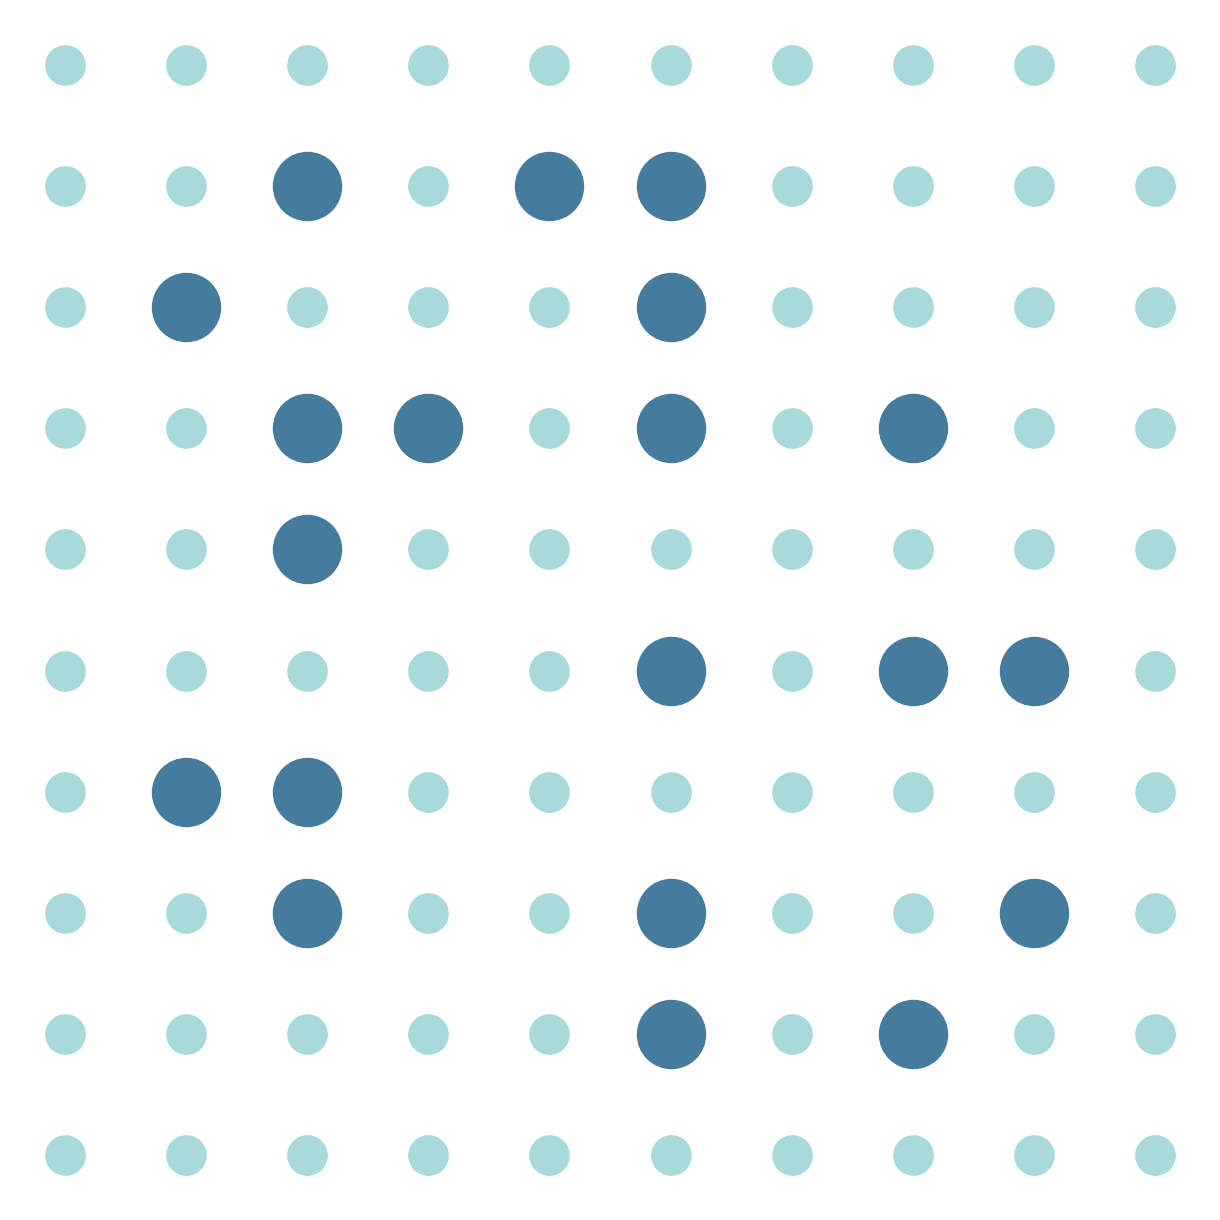

In [235]:
# Get the possible positions of the foreground nodes
possible_positions = {(x,y):(y,-x) for x in range(1, MATRIX_SIDE-1) for y in range(1, MATRIX_SIDE-1)}

# Choose the positions ramdomly by positions' keys
chosen_positions_keys = random.sample(list(possible_positions.keys()), NO_FG_NODES)

# Get the chosen positions
chosen_positions = {k:possible_positions[k] for k in chosen_positions_keys}

# Draw the foreground nodes
plt.figure(figsize = FIG_SIZE)
print(G.nodes())
nx.draw(G, pos=pos, node_color = COLOR_BG, node_size = SIZE_BG_NODES)
nx.draw_networkx_nodes(G, pos=pos, nodelist=chosen_positions, node_color = COLOR_FG, node_size = SIZE_FG_NODES)

### Task 3

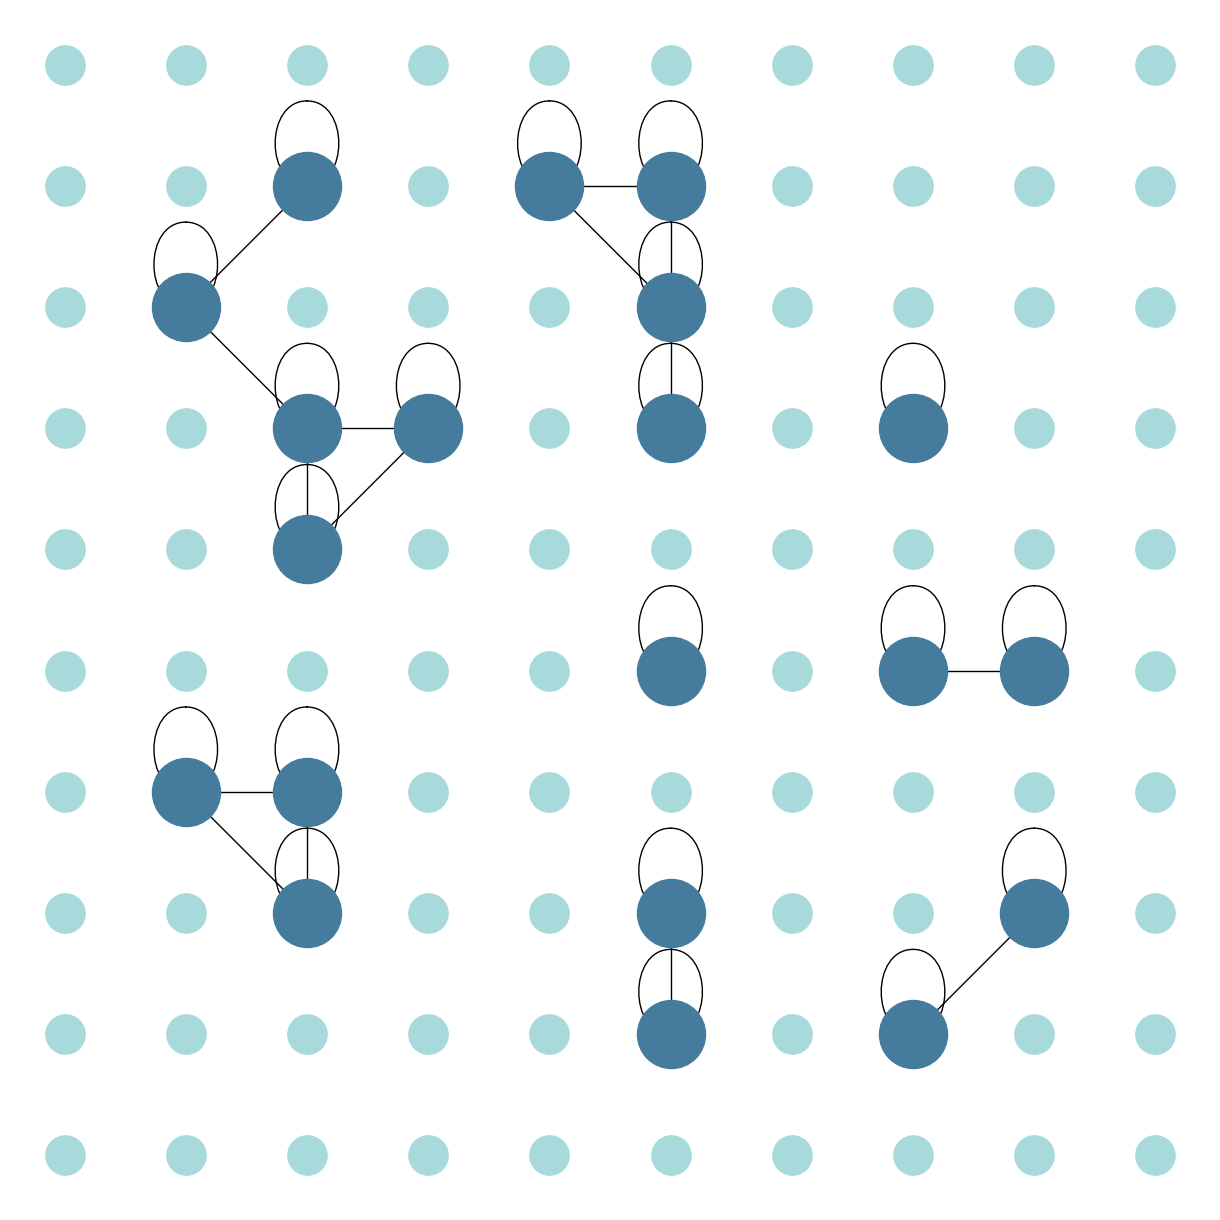

In [236]:
plt.figure(figsize = FIG_SIZE)
for x in range(MATRIX_SIDE):
    for y in range(MATRIX_SIDE):
        if (x,y) in chosen_positions:
            for i in range(-1,2):
                for j in range(-1,2):
                    if (x+i,y+j) in chosen_positions:
                        G.add_edge((x, y), (x+i,y+j), weight = EDGE_FG_WEIGHT, color = COLOR_FG)

        if (x,y) not in chosen_positions:
            pass

nx.draw(G, pos=pos, node_color = COLOR_BG, node_size = SIZE_BG_NODES)
nx.draw_networkx_nodes(G, pos=pos, nodelist=chosen_positions, node_color = COLOR_FG, node_size = SIZE_FG_NODES)


## 2.2 Sub-activity: Graph manipulation and output

### Task 4

In [247]:
print("The infomation about the graph:", nx.info(G), "\n")
print("The density of the graph is:", nx.density(G), "\n")
print("The degree centrality of the graph is:", nx.degree_centrality(G))

The infomation about the graph: Graph with 100 nodes and 35 edges 

The density of the graph is: 0.007070707070707071 

The degree centrality of the graph is: {(0, 0): 0.0, (0, 1): 0.0, (0, 2): 0.0, (0, 3): 0.0, (0, 4): 0.0, (0, 5): 0.0, (0, 6): 0.0, (0, 7): 0.0, (0, 8): 0.0, (0, 9): 0.0, (1, 0): 0.0, (1, 1): 0.0, (1, 2): 0.030303030303030304, (1, 3): 0.0, (1, 4): 0.04040404040404041, (1, 5): 0.04040404040404041, (1, 6): 0.0, (1, 7): 0.0, (1, 8): 0.0, (1, 9): 0.0, (2, 0): 0.0, (2, 1): 0.04040404040404041, (2, 2): 0.0, (2, 3): 0.0, (2, 4): 0.0, (2, 5): 0.05050505050505051, (2, 6): 0.0, (2, 7): 0.0, (2, 8): 0.0, (2, 9): 0.0, (3, 0): 0.0, (3, 1): 0.0, (3, 2): 0.05050505050505051, (3, 3): 0.04040404040404041, (3, 4): 0.0, (3, 5): 0.030303030303030304, (3, 6): 0.0, (3, 7): 0.020202020202020204, (3, 8): 0.0, (3, 9): 0.0, (4, 0): 0.0, (4, 1): 0.0, (4, 2): 0.04040404040404041, (4, 3): 0.0, (4, 4): 0.0, (4, 5): 0.0, (4, 6): 0.0, (4, 7): 0.0, (4, 8): 0.0, (4, 9): 0.0, (5, 0): 0.0, (5, 1): 0.0, (

/var/folders/dn/rwz32gqj5951m0mt9y7smnn80000gn/T/ipykernel_74623/1329196494.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print("The infomation about the graph:", nx.info(G), "\n")


### Task 5

In [244]:
# Save the graph as a JSON file named "graph.json" to the current directory
with open ("graph.json", "w") as f:
    json.dump(json_graph.node_link_data(G), f, indent = 4)